# Baseline model to simulate outbreak

#### Author: Yiran Jing

#### Date: Feb 2020


## Contents:
1. EDA and Feature Engineering
1. Polynomial regression
   1. Chinese total comfirmed cases
   2. For each province
   
## Summary
For Polynomial regression, 
- China total comfirmed cases, optimal degree is 2, and seems fit well.
- Hubei only, ptimal degree is 2, and seems fit well.
- Ex-hubei fit better when degree = 3 

In [1]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import pandas as pd
import pandas
import datetime
import matplotlib.dates as mdates
from helper_fun_model import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [12]:
%%time
## Update data from DXY
! cd ../data_processing && python DXY_AreaData_query.py

2020-02-09 23:51:46Update records successfully to ../data/DXYArea.csv
Save area daily dataset (English) into ../data/DXYArea.csv
CPU times: user 96.3 ms, sys: 34.6 ms, total: 131 ms
Wall time: 7.75 s


In [13]:
## Load data 
DXYArea = pd.read_csv("../data/DXYArea.csv")
DXYArea = add_days(DXYArea) # add the number of days after 2019-12-08
DXYArea.tail(3) # check new

,date,country,countryCode,province,city,confirmed,suspected,cured,dead,provinceCode,cityCode,Days
6321,2020-02-09,泰国,TH,NaN,NaN,32,0,8,0,NaN,NaN,63
6322,2020-02-09,美国,US,NaN,NaN,12,0,3,0,NaN,NaN,63
6323,2020-02-09,越南,VN,NaN,NaN,14,0,3,0,NaN,NaN,63


In [4]:
len(DXYArea)

7828

In [14]:
Train, Test = split_train_test_by_date(DXYArea)

Train dataset: data before 2020-02-07 00:00:00 
Test dataset: the last 3 days


### EDA

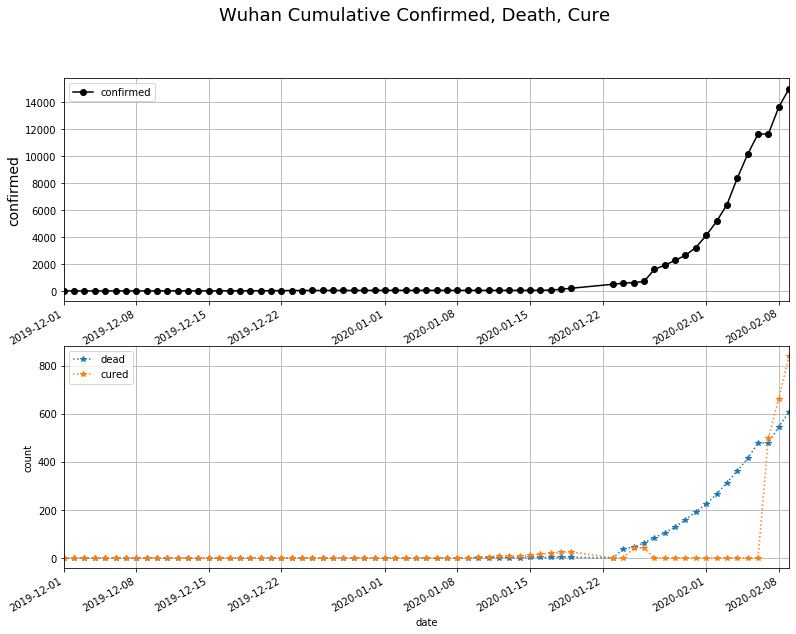

In [16]:
# Input City name or Province name
draw_city_trend("Wuhan", DXYArea) # city 

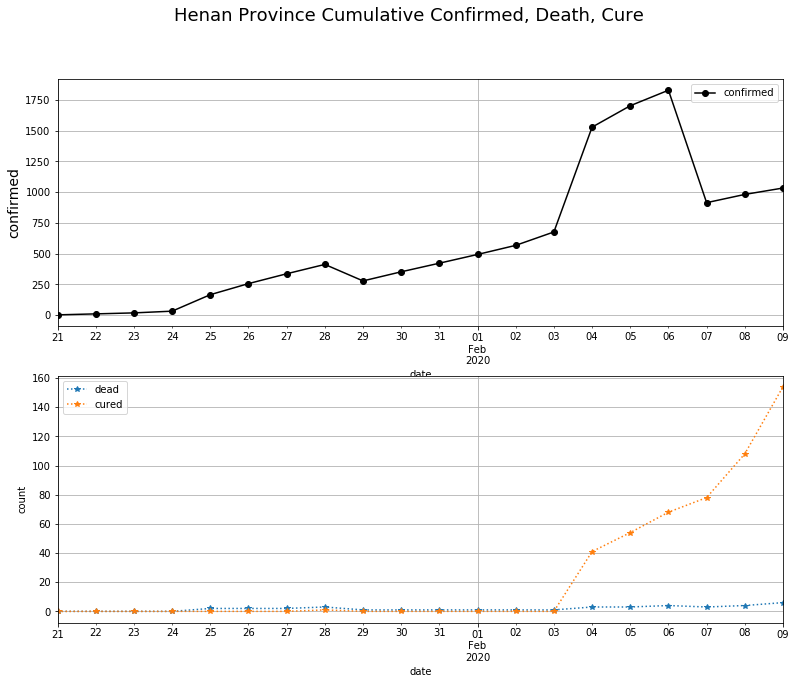

In [17]:
draw_province_trend("Henan Province", DXYArea)

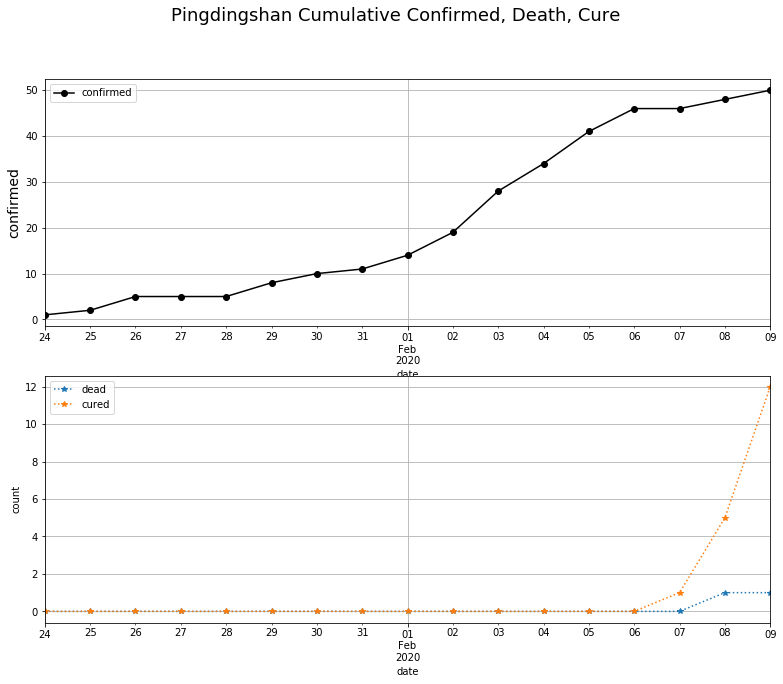

In [18]:
draw_city_trend("Pingdingshan", DXYArea) # my hometown 

In [28]:
type(overall_df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

## Polynomial regression

In [41]:
"""
Sum up all province  
"""
# China total
overall_df = overall_df[overall_df['date'] > datetime.datetime(2020, 1, 22)]
overall_df = pd.DataFrame(overall_df.groupby(['date']).agg({'confirmed': "sum",
                                                                'cured': "sum",
                                                                'dead': 'sum',
                                                                'Days': 'mean'})).reset_index()
Train, Test = split_train_test_by_date(overall_df)

X_train = Train['Days']
y_train = Train['confirmed']
X_test =  Test['Days']
y_test = Test['confirmed']

Train dataset: data before 2020-02-07 00:00:00 
Test dataset: the last 3 days


### Case1: Overall 

Degree 1:
RMSE of training set is 4764.6294554704355
R2 score of training set is 0.9460358393974241

RMSE of test set is 56494.276823682194
R2 score of test set is -6.3057293805646895
---------------------------------------

Degree 3:
RMSE of training set is 697.1034705445295
R2 score of training set is 0.9988448412999095

RMSE of test set is 38817.205615847706
R2 score of test set is -2.4490795396136065
---------------------------------------

Degree 2:
RMSE of training set is 699.5712325747597
R2 score of training set is 0.9988366482479615

RMSE of test set is 38369.65714622886
R2 score of test set is -2.3700047327956337
---------------------------------------



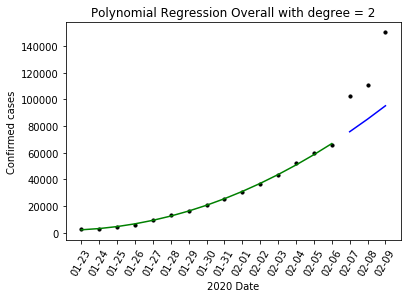

In [43]:
"""
Model selection:
  find optimal degree level
  Then draw plot using the optimal degree
"""
# select the best degree 
create_polynomial_regression_model(1, "Overall", overall_df, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Overall", overall_df, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Overall", overall_df, X_train, X_test, y_train, y_test, draw_plot = True)

**based on the result above, we can clearly see that degree = 2 gives us best estimation. So now we use degree = 2 to predict the next 4 days**

Degree 2:
RMSE of training set is 7636.666346575917
R2 score of training set is 0.9653801196015391

---------------------------------------



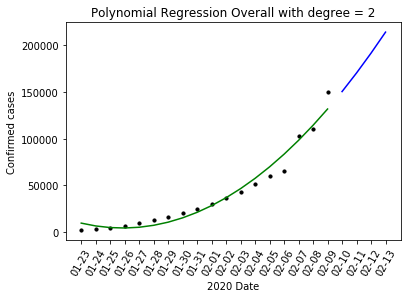

In [44]:
forecast_next_4_days(2, "Overall", overall_df)

### Case2: Each Province

In [ ]:
# See Hubei Province 
Hubei= DXYArea[DXYArea['province'] == 'Hubei Province']
 
X_train, X_test, y_train, y_test = data_processing(Hubei)    

# select the best degree 
create_polynomial_regression_model(1, "Hubei Probince", overall_df, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Hubei Probince", overall_df, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Hubei Probince", overall_df, X_train, X_test, y_train, y_test, draw_plot = True)

forecast_next_4_days(2, "Hubei Probince", overall_df)

In [ ]:
# See Hubei Province 
NotHubei= DXYArea[DXYArea['provinceName'] != 'Hubei Province']
 
X_train, X_test, y_train, y_test = data_processing(NotHubei)    

# select the best degree 
create_polynomial_regression_model(1, "Ex-Hubei", overall_df, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Ex-Hubei", overall_df, X_train, X_test, y_train, y_test, draw_plot = True)
create_polynomial_regression_model(2, "Ex-Hubei", overall_df, X_train, X_test, y_train, y_test, draw_plot = False)

forecast_next_4_days(3, "Ex-Hubei", overall_df)